In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
df = pd.read_csv('Datasets/prisoners.csv')
df.head()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
0,Andhra Pradesh,2013,9480,13758,672,170
1,Arunachal Pradesh,2013,0,0,0,0
2,Assam,2013,676,750,14,30
3,Bihar,2013,1693,3013,125,1417
4,Chhatisgarh,2013,1664,1803,192,103


In [3]:
df.tail()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
30,D & N Haveli,2013,0,0,0,0
31,Daman & Diu,2013,0,0,0,0
32,Delhi,2013,1458,1187,908,174
33,Lakshadweep,2013,0,0,0,0
34,Pondicherry,2013,0,0,0,0


In [4]:
df.describe()

,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
count,35.0,35.000000,35.000000,35.000000,35.000000
mean,2013.0,1057.914286,1534.857143,237.457143,210.171429
std,0.0,2078.196777,3022.110503,375.614191,359.117340
min,2013.0,0.000000,0.000000,0.000000,0.000000
25%,2013.0,0.000000,6.500000,2.000000,0.000000
50%,2013.0,167.000000,237.000000,33.000000,38.000000
75%,2013.0,1294.500000,1733.500000,234.500000,227.500000
max,2013.0,9480.000000,13758.000000,1353.000000,1417.000000


In [5]:
print(f'There are {len(df.columns)} columns in prisoners dataset.')

There are 6 columns in prisoners dataset.


In [6]:
# rows with 0 inmates
df[df.iloc[:, 2:].eq(0).all(axis=1)]['STATE/UT'].tolist()

['Arunachal Pradesh',
 'Manipur',
 'Nagaland',
 'Sikkim',
 'D & N Haveli',
 'Daman & Diu',
 'Lakshadweep',
 'Pondicherry']

In [7]:
# the total inmates for each state/ut
df['total_benefitted'] = df.iloc[:, 2:].sum(axis=1)
df.head()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,total_benefitted
0,Andhra Pradesh,2013,9480,13758,672,170,24080
1,Arunachal Pradesh,2013,0,0,0,0,0
2,Assam,2013,676,750,14,30,1470
3,Bihar,2013,1693,3013,125,1417,6248
4,Chhatisgarh,2013,1664,1803,192,103,3762


In [8]:
# total inmates benefitted by different resources
df.loc['totals'] = df.iloc[:, 2:].sum(axis=0)
df.tail()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,total_benefitted
31,Daman & Diu,2013.0,0.0,0.0,0.0,0.0,0.0
32,Delhi,2013.0,1458.0,1187.0,908.0,174.0,3727.0
33,Lakshadweep,2013.0,0.0,0.0,0.0,0.0,0.0
34,Pondicherry,2013.0,0.0,0.0,0.0,0.0,0.0
totals,NaN,NaN,37027.0,53720.0,8311.0,7356.0,106414.0


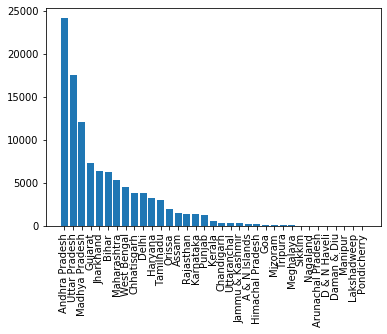

In [10]:
temp_df = df[:-1][['STATE/UT', 'total_benefitted']].sort_values(by='total_benefitted', ascending=False)

plt.bar(x='STATE/UT', height='total_benefitted', data=temp_df)
plt.xticks(rotation=90);

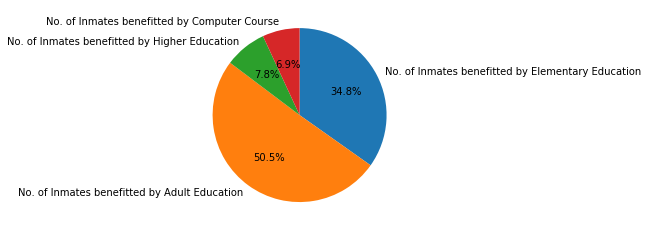

In [20]:
# pie chart that depicts the ratio among different modes of benefits
plt.pie(df.loc['totals'][2:-1], labels=df.loc['totals'][2:-1].index, autopct='%.1f%%', startangle=90, counterclock=False);